<a href="https://colab.research.google.com/github/vasilikapapa/t-Trace-and-implement-SA-for-a-boolean-gate/blob/main/Trace_and_implement_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trace and implement SA for a boolean gate



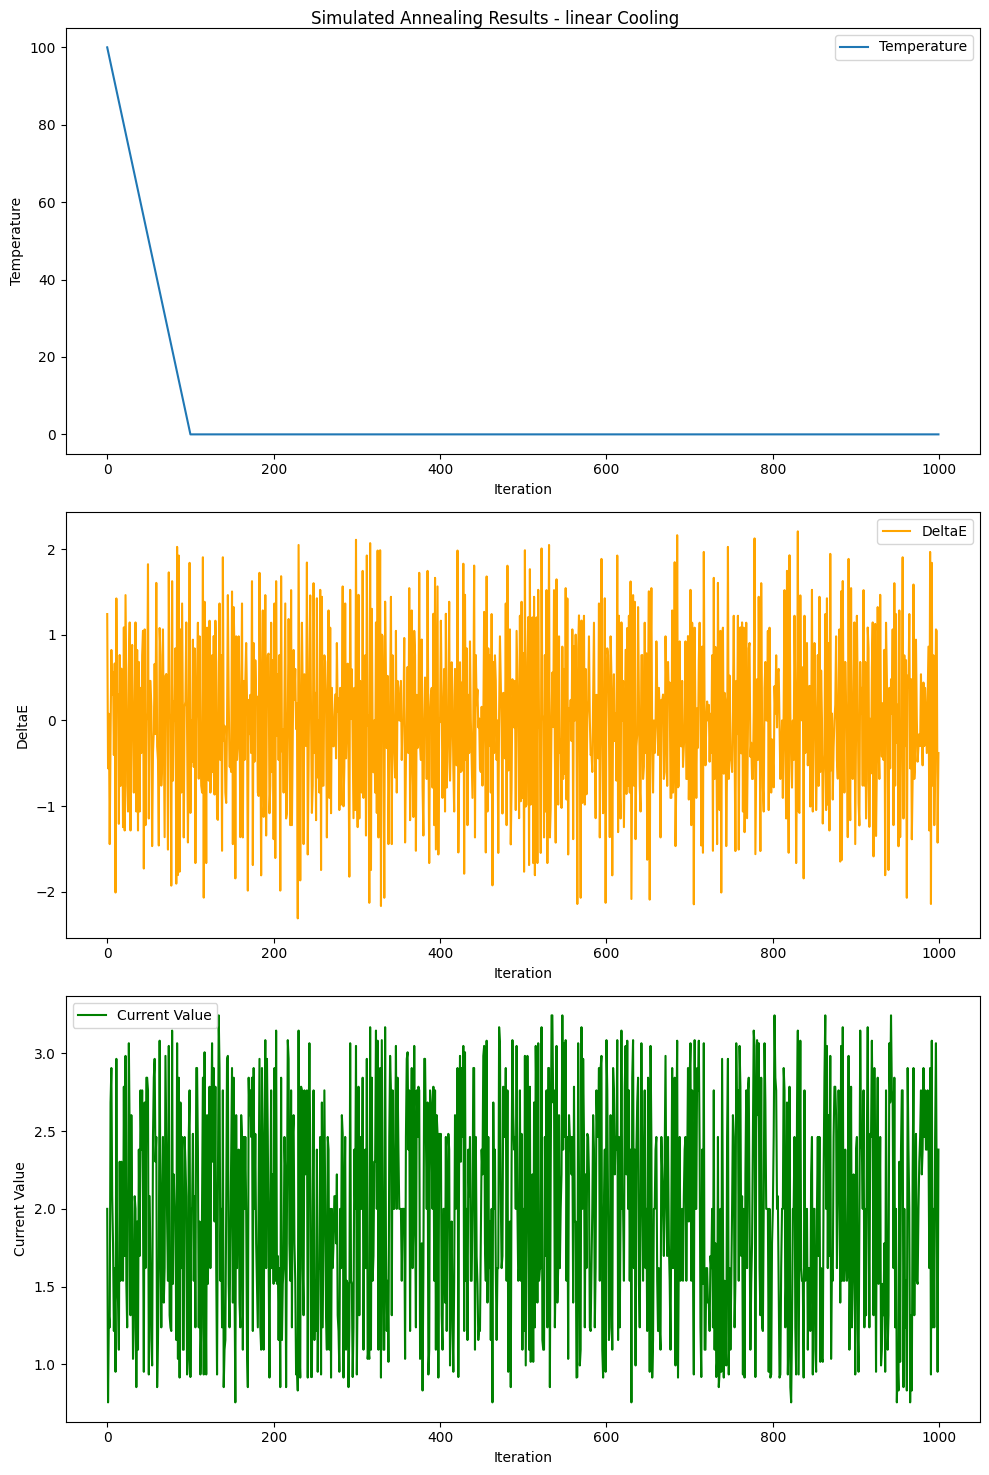

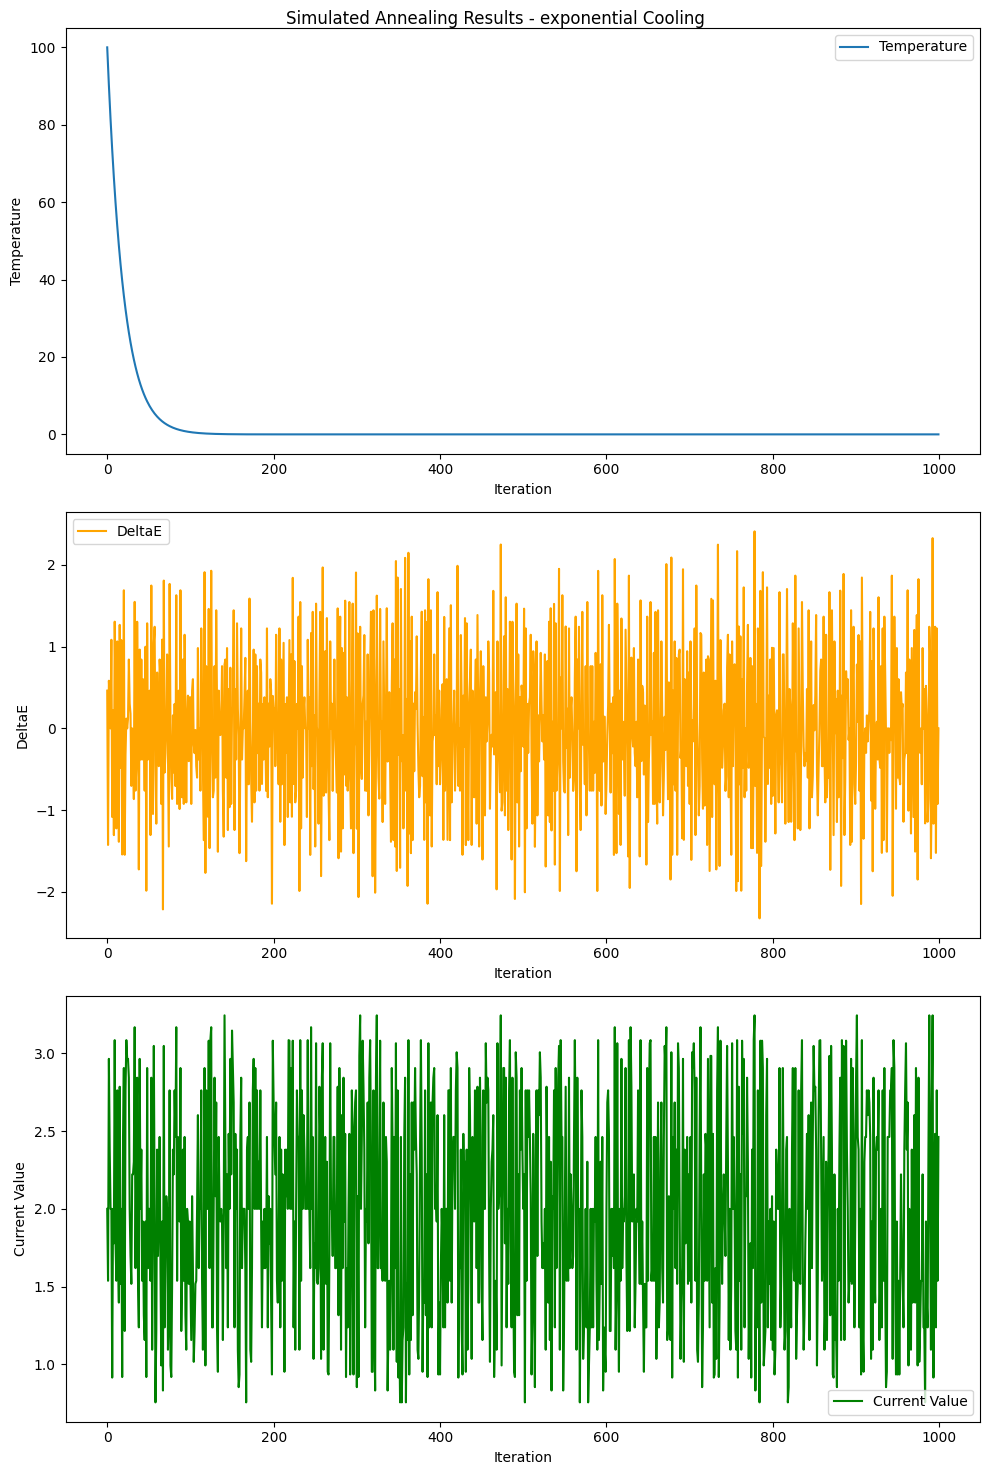

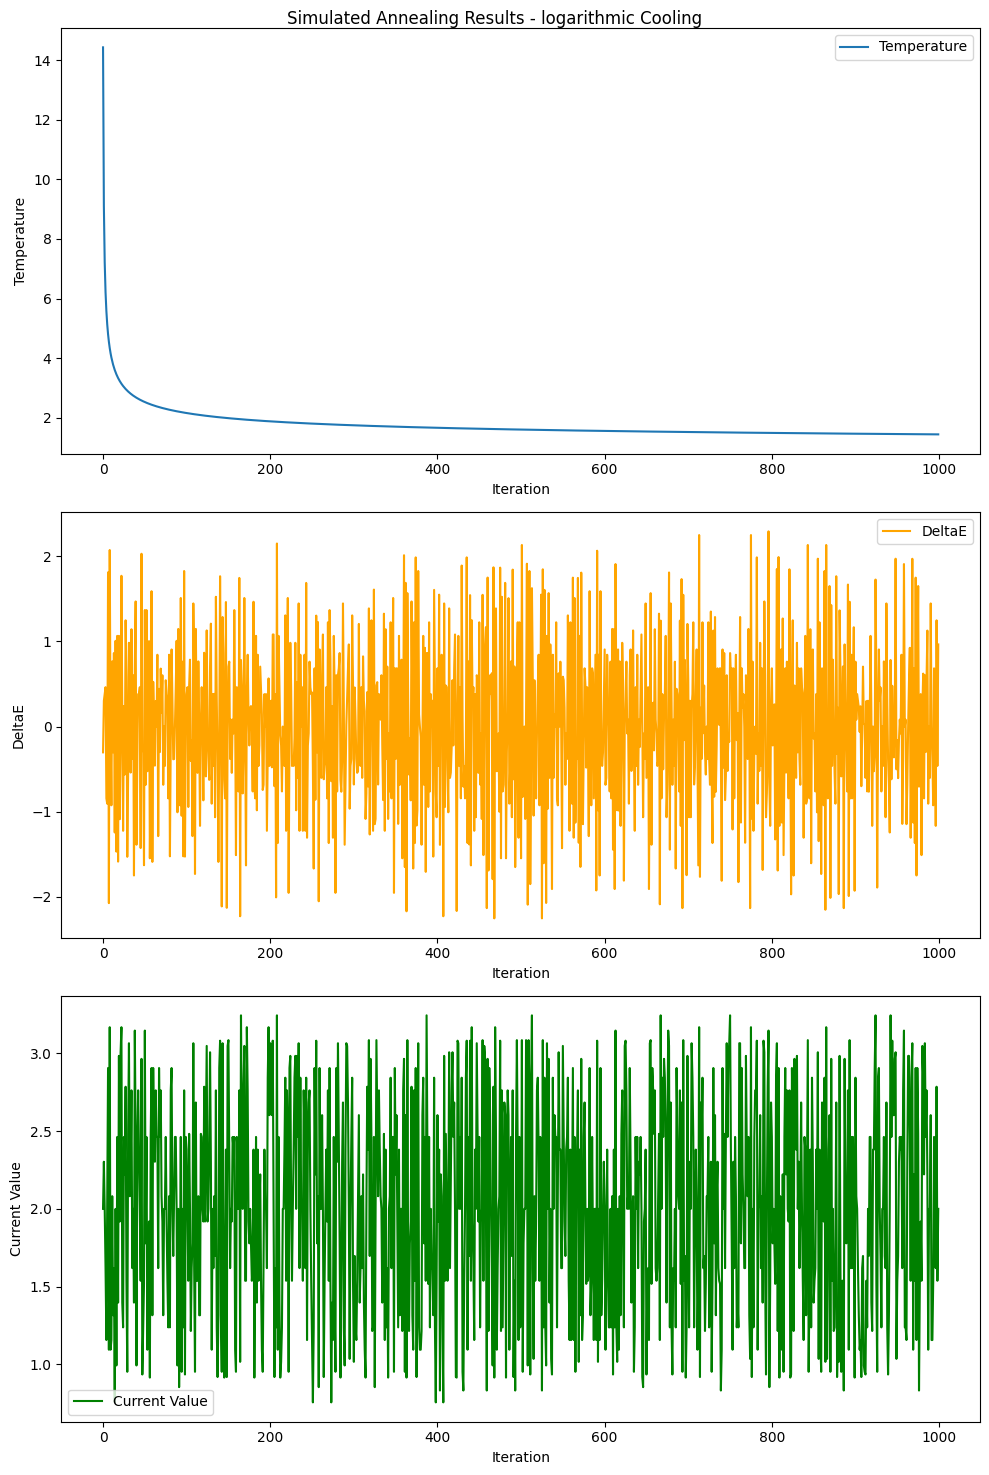

In [ ]:
import math  # Import math module for exponential function
import random
def boolean_logic_gate(gate_type, weights):
    # All possible inputs for all boolean logic gates
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    # Expected outputs for each of the functions
    match gate_type:
        case "AND":
            expected_outputs = [0, 0, 0, 1]
        case "OR":
            expected_outputs = [0, 1, 1, 1]
        case "NAND":
            expected_outputs = [1, 1, 1, 0]
        case "NOR":
            expected_outputs = [1, 0, 0, 0]

    # Calculate logic gate error
    def calculate_logic_gate_error(weights):
        total_error = 0
        for index, input_pair in enumerate(inputs):
            # Calculate neuron's output using a linear combination of inputs and weights
            value = weights[0] * input_pair[0] + weights[1] * input_pair[1] + weights[2]  # Wx1*x1 + Wx2*x2 + bias

             # Calculate error (difference between expected and actual output)
            error = abs(expected_outputs[index] - (1/(1 + math.exp(- value))))

            total_error += error

        return total_error

    return calculate_logic_gate_error(weights)

import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting

def Simulated_Annealing(gate_type, initial_weights, temp_start, cooling_schedule, cooling_param, temp_end, iterations, writer):
    current_config = initial_weights
    temp = temp_start
    iteration_data = []

    for iteration in range(iterations):
        if cooling_schedule == "linear":
            temp = max(temp_start - cooling_param * iteration, temp_end)
        elif cooling_schedule == "exponential":
            temp = temp_start * (cooling_param ** iteration)
        elif cooling_schedule == "logarithmic":
            temp = temp_start / (cooling_param * math.log(iteration + 2))
        temp = max(temp, temp_end)  # Ensure temp does not fall below temp_end

        next_config = [random.randint(-2, 2) for _ in range(len(initial_weights))]
        current_value = boolean_logic_gate(gate_type, current_config)
        next_value = boolean_logic_gate(gate_type, next_config)
        deltaE = current_value - next_value

        exp_arg = -deltaE / temp
        probability = 0 if exp_arg < -709 else math.exp(exp_arg)  # Safeguard against overflow

        iteration_data.append({
            'Iteration': iteration,
            'Temperature': temp,
            'Current Configuration': str(current_config),
            'Next Configuration': str(next_config),
            'DeltaE': deltaE,
            'Current Value': current_value,
            'Next Value': next_value,
            'Probability': probability
        })
        if deltaE > 0 or probability > random.uniform(0, 1):
            current_config = next_config

     # Plotting
    df = pd.DataFrame(iteration_data)
    plot_iteration_data(df, cooling_schedule)

    # Save the DataFrame to an Excel file
    df.to_excel(writer, sheet_name=cooling_schedule, index=False)

def plot_iteration_data(df, cooling_schedule):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    fig.suptitle(f'Simulated Annealing Results - {cooling_schedule} Cooling')

    # Temperature vs. Iterations
    axs[0].plot(df['Iteration'], df['Temperature'], label='Temperature')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Temperature')
    axs[0].legend()

    # DeltaE vs. Iterations
    axs[1].plot(df['Iteration'], df['DeltaE'], label='DeltaE', color='orange')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('DeltaE')
    axs[1].legend()

    # Objective Value vs. Iterations
    axs[2].plot(df['Iteration'], df['Current Value'], label='Current Value', color='green')
    axs[2].set_xlabel('Iteration')
    axs[2].set_ylabel('Current Value')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

# Main execution
gate_type = 'OR'
initial_weights = [0, 0, 0]
temp_start = 100.0
temp_end = 0.01
iterations = 1000
filename = 'simulated_annealing_results.xlsx'

schedules = ["linear", "exponential", "logarithmic"]
cooling_params = {
    "linear": 1.0,
    "exponential": 0.95,
    "logarithmic": 10
}
with pd.ExcelWriter(filename, engine='openpyxl') as writer:
    for schedule in schedules:
        cooling_param = cooling_params[schedule]
        Simulated_Annealing(gate_type, initial_weights, temp_start, schedule, cooling_param, temp_end, iterations, writer)
